In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
data_train = pd.read_csv('EMNIST_CSV/emnist-balanced-train.csv')
data_test = pd.read_csv('EMNIST_CSV/emnist-balanced-test.csv')


In [138]:
def rotate(row):
    image = np.array(row).reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return pd.Series(image.reshape([28 * 28]))

data_train.iloc[:, 1:] = data_train.iloc[:, 1:].apply(rotate, axis=1, result_type='expand')
data_test.iloc[:, 1:] = data_test.iloc[:, 1:].apply(rotate, axis=1, result_type='expand')


data_t = np.array(data_train)
data_d = np.array(data_test)
m, n = data_t.shape
np.random.shuffle(data_t)

data_dev = data_d.T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data_t.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

NUM_CLASSES = 62  

In [139]:
print(X_train.shape)


(784, 697931)


In [140]:
def init_params():
    W1 = np.random.rand(NUM_CLASSES, 784) - 0.5
    b1 = np.random.rand(NUM_CLASSES, 1) - 0.5
    W2 = np.random.rand(NUM_CLASSES, NUM_CLASSES) - 0.5
    b2 = np.random.rand(NUM_CLASSES, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def hot_encoding(Y):
    one_hot_Y = np.zeros((Y.size, NUM_CLASSES))
    one_hot_Y[np.arange(Y.size), Y.astype(int)] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [141]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [142]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
[46 58  4 ... 50 61 52] [40  7 47 ... 25  1  6]
0.03665548600076512
Iteration:  10
[10  7 16 ... 47  1 49] [40  7 47 ... 25  1  6]
0.09107204007272925
Iteration:  20
[40  7 16 ... 47  1 49] [40  7 47 ... 25  1  6]
0.14021443380506096
Iteration:  30
[40  7 16 ... 47  1 49] [40  7 47 ... 25  1  6]
0.18811458439301307
Iteration:  40
[40  7 16 ... 47  1 28] [40  7 47 ... 25  1  6]
0.22986512993404792
Iteration:  50
[40  7 16 ... 47  1 28] [40  7 47 ... 25  1  6]
0.2633326217061572
Iteration:  60
[40  7 16 ... 47  1 28] [40  7 47 ... 25  1  6]
0.2913067337602141
Iteration:  70
[40  7 16 ... 47  1 28] [40  7 47 ... 25  1  6]
0.3151557962033496
Iteration:  80
[40  7 16 ... 47  1 28] [40  7 47 ... 25  1  6]
0.3356205699417278
Iteration:  90
[40  7 16 ... 47  1 28] [40  7 47 ... 25  1  6]
0.3530793158636026
Iteration:  100
[40  7 16 ... 47  1 28] [40  7 47 ... 25  1  6]
0.3679962632409221
Iteration:  110
[40  7 16 ... 47  1 28] [40  7 47 ... 25  1  6]
0.38067086861022076
Iteration

KeyboardInterrupt: 

In [143]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

label_map = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", 
            "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", 
            "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", 
            "U", "V", "W", "X", "Y", "Z", 
            "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", 
            "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", 
            "u", "v", "w", "x", "y", "z"]

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", label_map[prediction[0]], prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [144]:
from PIL import Image

def test_custom_image(image_path, W1, b1, W2, b2):
    image = Image.open(image_path).convert('L')  
    image = image.resize((28, 28))
    image_data = np.array(image) / 255.  

    image_data = image_data.reshape(784, 1)
   
    prediction = make_predictions(image_data, W1, b1, W2, b2)
    
    print("Prediction: ", label_map[prediction[0]], prediction)
    
    plt.gray()
    plt.imshow(image_data.reshape((28, 28)) * 255, interpolation='nearest')
    plt.show()



Prediction:  N [23]
Label:  23


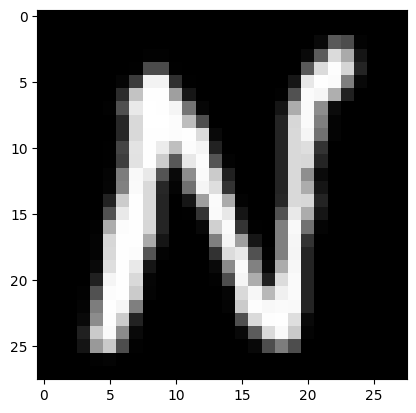

In [168]:
# test_prediction(7, W1, b1, W2, b2)

random_number = np.random.randint(0, m_train)
test_prediction(random_number, W1, b1, W2, b2)